# A study on em🌳jis and weed

Starting from the document http://www.hempyreum.org/en/72640 using the [PDF](http://www.gallup.com/file/poll/196556/161019LegalMarijuana.pdf)

## PdfMiner

Use pdfminer3k - the python 3 fork of pdfminer to parse the document from 

In [44]:
#     %%bash
#     pip install git+https://github.com/jaepil/pdfminer3k
#     pdf2txt.py ../../Downloads/161019LegalMarijuana.pdf > legal.txt

### Split the parsed text

In [45]:
    from fidget import a, the, stars
    from wip.clsindex import PathIndex

    blob = PathIndex('legal.txt').read_text().str.split('Do you think the use of marijuana should be made legal, or not\?').apply(the.last()).str.strip()[0].replace('\n^ Asked of a half sample. \n', '')

    *columns, blob = blob.split('\n'*2, 3)

### Chop it up further into a dataframe

In [79]:
from pandas import *
df = the[the.enumerate().groupby(
    the.first()[lambda x: x//(1+(len(blob.splitlines())//4))]
)].valmap(a.pluck(1).list())[dict.values].list()[Series](blob.splitlines()).apply(Series).T
df = df[df.astype(bool).all(axis=1)]
df.columns = 'time', *list('+-~')

df['half_sample'] = df['time'].apply(a.contains('^'))
df['time'] = df['time'].str.rstrip(' ^ ').str.split('-', 1).apply(the.first()).pipe(to_datetime, format="%Y %b %d")
df = df.set_index('time').astype(int)
df.sample(10).T

time,2013-10-03 00:00:00,2001-08-03 00:00:00,2012-11-26 00:00:00,1977-04-01 00:00:00,1972-03-03 00:00:00,2011-10-06 00:00:00,2016-10-05 00:00:00,2014-10-12 00:00:00,1985-05-17 00:00:00,2015-10-07 00:00:00
+,58,34,48,28,15,50,60,51,23,58
-,39,62,50,66,81,46,39,47,73,40
~,3,4,1,6,4,3,1,2,4,2
half_sample,0,0,0,0,0,0,0,0,0,0


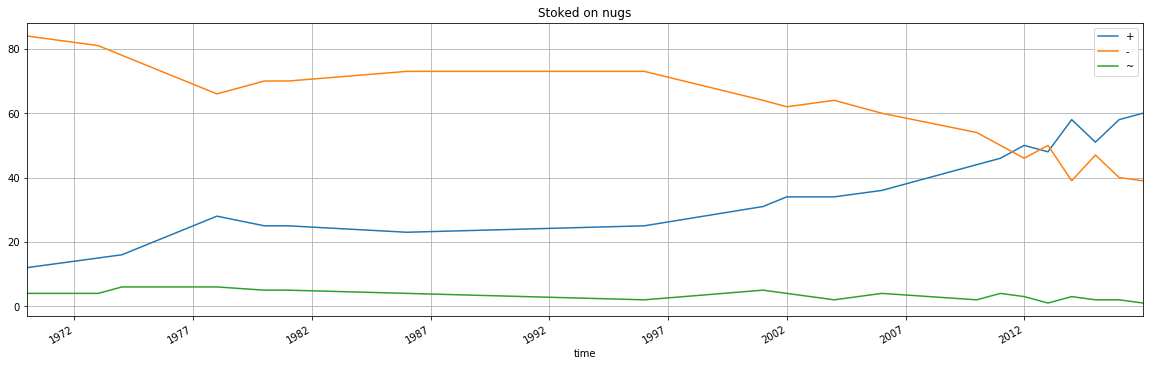

In [84]:
%matplotlib inline
data = df[list('+-~')].groupby(TimeGrouper('A')).sum().pipe(lambda df: df[df.gt(0).all(axis=1)])
data.plot(title='Stoked on nugs', figsize=(20,6), grid=True);

In [85]:
from bokeh.plotting import *; output_notebook()

p = figure(x_axis_type='datetime', height=400, width=900, title="👍 or 👎 on nuggage")

source = data.pipe(ColumnDataSource)
txt = dict(text_baseline='middle', text_align='center', source=source, text_font_size='5em', text_alpha=.9)
line = dict(source=source, line_color='yellow', line_width=20, line_alpha=.5)
p.line('time', '-', **line) and p.text('time', '-', dict(value='👎'), **a.merge(txt)(dict(text_font_size='4rem')))
p.line('time', '+', **line) and p.text('time', '+', dict(value='👍'), **txt)

show(p)

Loading BokehJS ...